# Week 10 - Taxi
## Name: Rakshit Ramachandra Ayachit
## Registration No.: 210968045
## Batch: B1
## Section: DSE-A


In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
env = gym.make('Taxi-v3')

In [4]:
alpha = 0.4
gamma = 0.9
epsilon = 0.9
num_episodes = 2000

In [5]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

epsilon_greedy_policy implements an epsilon-greedy policy for selecting actions based on the current state and epsilon value. It chooses a random action with probability epsilon and selects the action with the highest Q-value for the current state with probability (1 - epsilon).


In [6]:
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

sarsa performs the SARSA (State-Action-Reward-State-Action) algorithm to learn the Q-values for the taxi environment. It iterates through a fixed number of episodes, updating the Q-values based on the observed rewards and next states, following the SARSA update rule. At each step, it selects actions based on the epsilon-greedy policy.


In [7]:
def sarsa():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy_policy(state, epsilon)
        total_reward = 0
        while True:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(next_state, epsilon)
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            total_reward += reward
            state = next_state
            action = next_action
            if done:
                rewards.append(total_reward)
                break
    return rewards

In [8]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

This function implements the Q-Learning algorithm to learn the Q-values for the taxi environment. Similar to SARSA, it iterates through a fixed number of episodes, updating the Q-values based on the observed rewards and next states, following the Q-learning update rule. Actions are selected based on the epsilon-greedy policy.


In [9]:
def q_learning():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = epsilon_greedy_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            total_reward += reward
            state = next_state
            if done:
                rewards.append(total_reward)
                break
    return rewards


In [10]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

expected_sarsa applies the Expected SARSA algorithm to learn the Q-values for the taxi environment. It follows a similar procedure to SARSA and Q-Learning but computes the expected value of the next state's Q-values instead of selecting a specific action. This approach accounts for the stochasticity of the policy, providing a more robust estimate of the next state's value.


In [11]:
def expected_sarsa():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = epsilon_greedy_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            expected_value = np.dot(Q[next_state, :], np.ones(env.action_space.n) * epsilon / env.action_space.n) + \
                             np.max(Q[next_state, :]) * (1 - epsilon)
            Q[state, action] += alpha * (reward + gamma * expected_value - Q[state, action])
            total_reward += reward
            state = next_state
            if done:
                rewards.append(total_reward)
                break
    return rewards

In [12]:
r_sarsa = sarsa()
r_qlearn = q_learning()
r_esarsa = expected_sarsa()

Text(0, 0.5, 'Rewards')

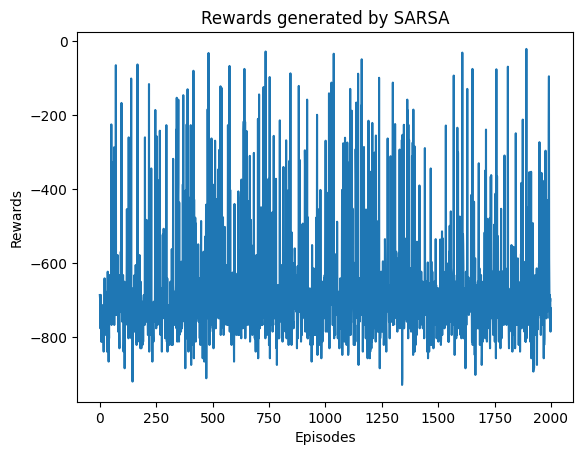

In [13]:
plt.plot(r_sarsa)
plt.title('Rewards generated by SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

In [14]:
np.mean(r_sarsa)

-669.689

Text(0, 0.5, 'Rewards')

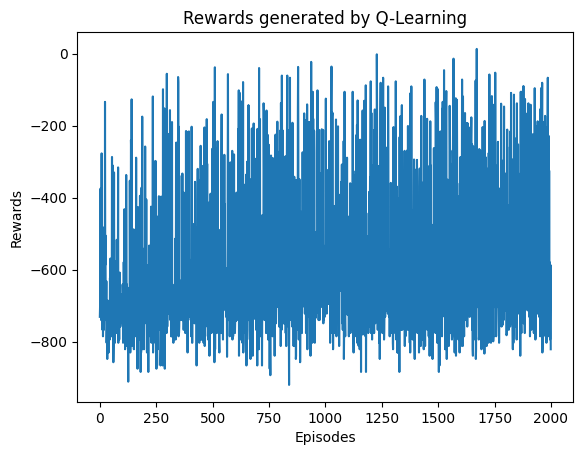

In [15]:
plt.plot(r_qlearn)
plt.title('Rewards generated by Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

In [16]:
np.mean(r_qlearn)

-581.545

Text(0, 0.5, 'Rewards')

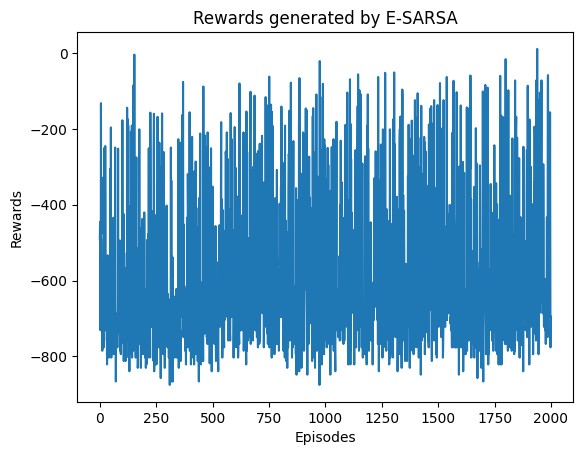

In [17]:
plt.plot(r_esarsa)
plt.title('Rewards generated by E-SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

In [18]:
np.mean(r_esarsa)

-599.9355

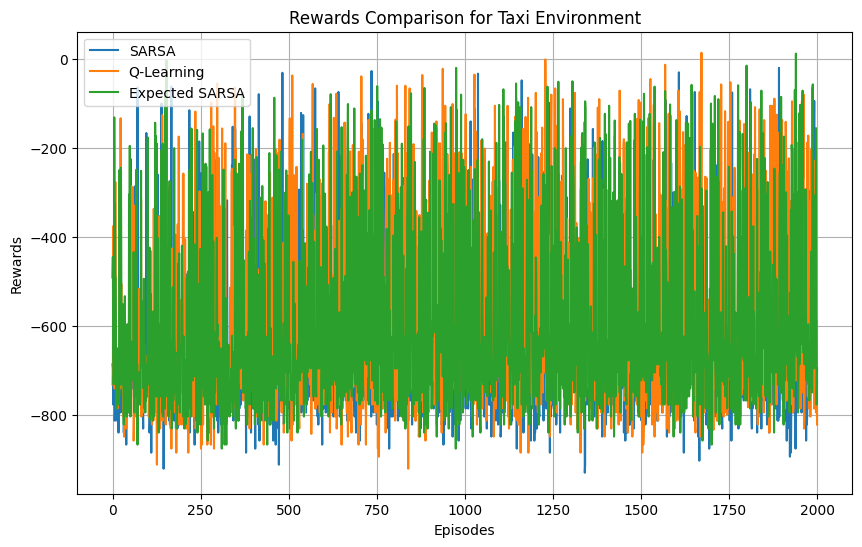

Mean Rewards:
---------------
Method		Mean Reward
---------------
SARSA		-669.69
Q-Learning		-581.54
Expected SARSA		-599.94


In [24]:
# Plotting rewards comparison
plt.figure(figsize=(10, 6))
plt.plot(r_sarsa, label='SARSA')
plt.plot(r_qlearn, label='Q-Learning')
plt.plot(r_esarsa, label='Expected SARSA')
plt.title('Rewards Comparison for Taxi Environment')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.grid()
plt.show()

# Tabulating mean rewards
mean_rewards = {
    'SARSA': np.mean(r_sarsa),
    'Q-Learning': np.mean(r_qlearn),
    'Expected SARSA': np.mean(r_esarsa)
}

print("Mean Rewards:")
print("-" * 15)
print("Method\t\tMean Reward")
print("-" * 15)
for method, mean_reward in mean_rewards.items():
    print(f"{method}\t\t{mean_reward:.2f}")


## Inference:

- SARSA: The mean reward obtained using the SARSA algorithm is the lowest among the three methods, with an average reward of approximately -669.69. This suggests that SARSA might struggle to learn an effective policy in the Taxi environment, possibly due to its on-policy nature, where it updates Q-values based on the current policy.

- Q-Learning: Q-Learning performs better than SARSA, with a mean reward of approximately -581.54. Q-Learning is an off-policy algorithm, allowing it to learn from both exploratory and greedy actions. This could contribute to its ability to find a more effective policy compared to SARSA.

- Expected SARSA: The mean reward obtained using Expected SARSA falls between SARSA and Q-Learning, with an average reward of approximately -599.94. Expected SARSA combines elements of both SARSA and Q-Learning, incorporating an expectation over possible next states. This makes it less sensitive to action selection errors but still more conservative than Q-Learning.

## Conclusion:

- Based on the mean rewards, Q-Learning seems to perform the best in this scenario, followed by Expected SARSA and then SARSA. However, further analysis, including convergence behavior and exploration-exploitation trade-offs, is necessary to make a conclusive decision on the most suitable algorithm for the Taxi environment.
